In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import umap
from sklearn.cluster import KMeans, HDBSCAN

In [14]:
# Download MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

rand_slice = np.random.randint(low=0, high=50000, size=1)

SLICE = slice(0, 60000)
# Now x_train, y_train, x_test, y_test contain the training and testing data

MNIST contains 784 dimensions. Each sample in x_train is an image. Each image has 28 rows and 28 columns to represent 784 pixels (28*28). So, MNIST images contain 784 dimensions. These need to be reduced (to avoid ["the curse of dimensiontality"](https://en.wikipedia.org/wiki/Curse_of_dimensionality))

In [15]:
print(f"Rows in Image: {len(x_train[0])},\
      \nColumns in Image: {len(x_train[0][0])},\
      \nDimensions (pixels): {len(x_train[0])*len(x_train[0][0])}")

Rows in Image: 28,      
Columns in Image: 28,      
Dimensions (pixels): 784


In [16]:
pca = PCA(n_components=2)

In [19]:
# Reshaped to have 10000 samples (images) with 784 columns each. Sklearn requires 2d numpy arrays so rather than having a 3D array, 
# with each image being a 2D array, the images are extended to have a column for each pixel.
ten_thou_pca = pca.fit_transform(X=x_train[SLICE].reshape(60000, 784), y=y_train[SLICE])

In [20]:
len(ten_thou_pca)

60000

<AxesSubplot:>

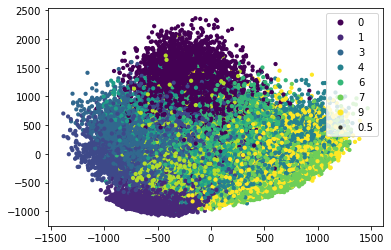

In [21]:
# xs = [components[0] for components in sixty_thou_clusters.components_]
# ys = [components[1] for components in sixty_thou_clusters.components_]
sns.scatterplot(y=ten_thou_pca[:,0], x=ten_thou_pca[:,1], hue=y_train[SLICE], palette='viridis', size=0.5, linewidth=0)

In [23]:
umap_model = umap.UMAP(n_neighbors=10)
embedding = umap_model.fit_transform(X=x_train[SLICE].reshape(60000, 784), y=y_train[SLICE])

<AxesSubplot:>

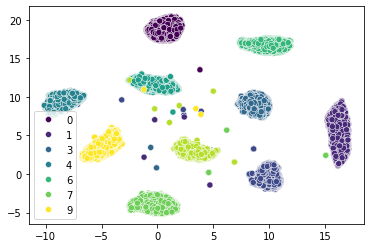

In [24]:
sns.scatterplot(y=embedding[:,0], x=embedding[:,1], hue=y_train[SLICE], palette='viridis')

/home/tristannew/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot:>

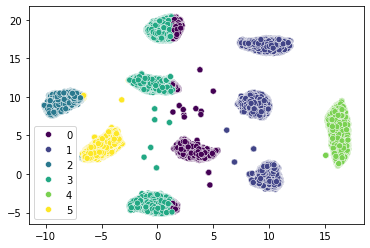

In [25]:
kmeans = KMeans(n_clusters=6)
kmeans_clusters = kmeans.fit_predict(X=embedding[:,1].reshape(-1, 1))
sns.scatterplot(y=embedding[:,0], x=embedding[:,1], hue=kmeans_clusters, palette='viridis')

<AxesSubplot:>

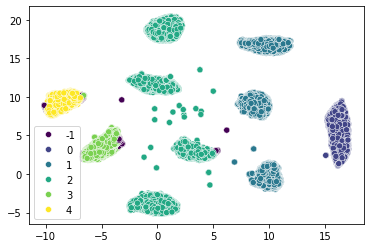

In [26]:
hdbscan = HDBSCAN(min_cluster_size=500)
hdbscan_clusters = hdbscan.fit_predict(X=embedding[:,1].reshape(-1, 1))
sns.scatterplot(y=embedding[:,0], x=embedding[:,1], hue=hdbscan_clusters, palette='viridis')

In [27]:
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


NameError: name 'faces_standardized' is not defined

In [ ]:
np.set_printoptions(precision=4, suppress=True)

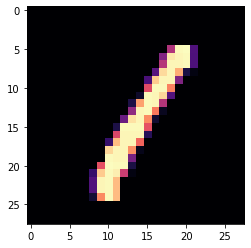

In [ ]:
plt.imshow(x_train[3], cmap='magma')